In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.metrics import (
    classification_report as creport
)

### **Load the Ar_PuFi Binary Datset**

In [ ]:
df= pd.read_csv('/content/Ar_PuFi.csv')
df

,Text,Label
0,معجب x 1 2 3 بيها بدرجة كبيرة من الاشخاص اللي ...,1
1,أنا معجب بها كثيرًا ، فالجميع يحتاج إلى تغيير ...,1
2,اعشق جرائتها صراحتها مع نفسها احبها من العراق,1
3,انت فين وحشتنا افلامك. انا كتير بحبك و بحب افل...,1
4,تفكيرها حلوو وجدا منطقي لما تناقش موضوع السينم...,1
...,...,...
24491,بيلف وبدور لانه غير قادر على رد مقنع بصراحة ان...,0
24492,دا متخلف بيجامل علي حساب دينه حسبي الله ونعم ا...,0
24493,ده عايز يعمل نفسه فاهم وللاسف ده جاهل واعتقد ...,0
24494,ده طلع تافه وفكره مراهق بتاع اطفال ثانوي ... ا...,0


In [ ]:
!git clone https://github.com/aub-mind/arabert.git


Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 564 (delta 188), reused 247 (delta 92), pack-reused 214
Receiving objects: 100% (564/564), 9.16 MiB | 26.80 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [ ]:
!pip install -q transformers
!pip install -q datasets
!pip install -q farasapy
!pip install -q pyarabic
!pip install -q emoji

     |████████████████████████████████| 4.0 MB 5.5 MB/s 
     |████████████████████████████████| 895 kB 24.3 MB/s 
     |████████████████████████████████| 6.6 MB 23.6 MB/s 
     |████████████████████████████████| 596 kB 41.6 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 136 kB 56.2 MB/s 
     |████████████████████████████████| 1.1 MB 52.4 MB/s 
     |████████████████████████████████| 212 kB 55.0 MB/s 
     |████████████████████████████████| 127 kB 57.8 MB/s 
     |████████████████████████████████| 271 kB 53.6 MB/s 
     |████████████████████████████████| 144 kB 62.8 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is

In [ ]:
import pandas as pd 

from sklearn.model_selection import train_test_split

from pathlib import Path

import torch
from torch.utils.data import Dataset, DataLoader

import transformers
from transformers import AutoModel, BertTokenizerFast, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
df_train= pd.read_csv('/content/Mubarak_17.csv')
df_train

,Text,Label
0,اسغي ياشعب تونس تدعوا بالاسلام كفار الحمدلله ن...,0
1,قطع يد السارق توفرت الشروط شرط الحد الأدنى قيم...,1
2,تلوموش لطفي لعبدلي شرف,1
3,مستغرب شعب يسمع تفاهة شانو لى الدرجة الشعب تاف...,1
4,هههخ غزلتني مافهمتش شمدخلها الموضوع تتنطر وحده...,1
...,...,...
6019,رحماك رب رحماك رب التوانسة ولات تناقش القرأن ت...,0
6020,إنسان تافه وكلام فارغ تفوووو كلب,0
6021,مريم معجبييك مي تحتي عيني قناة عادة مكروها ونط...,1
6022,نكره امها,0


In [ ]:
df_train['Label'].value_counts()

1    3820
0    2204
Name: Label, dtype: int64

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

(6024, 12248, 12248)

In [ ]:
BERT_MODEL_NAME = 'aubmindlab/bert-base-arabertv02-twitter'
bert = AutoModel.from_pretrained(BERT_MODEL_NAME)

tokenizer = BertTokenizerFast.from_pretrained(BERT_MODEL_NAME)

Downloading:   0%|          | 0.00/667 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dens

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

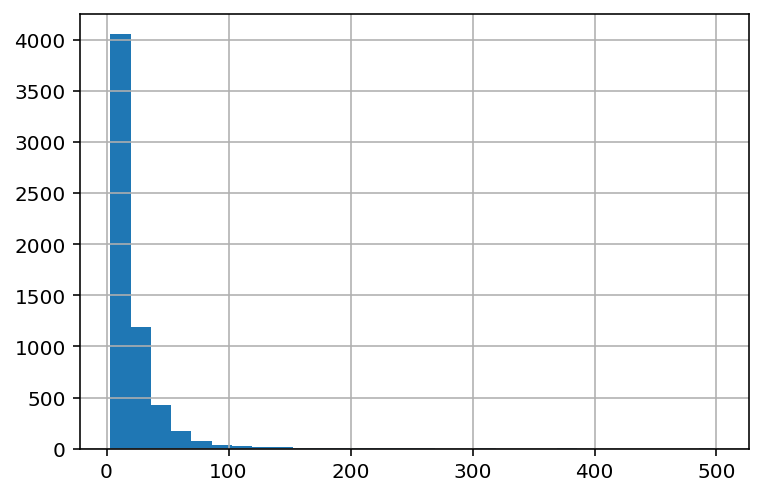

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmi

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([    2,  1319,  1135, 59642,   442,  3899,  7802,   181, 16526,   735,
         11557,   183,  6620, 45541, 12169,  2083, 15189,  1280, 26569,     3,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'labels': tensor(0),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

### **Mubarak_17 Training**

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 6024
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 189


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.523400,0.908240,0.566052,0.479313,0.751015,0.574975


***** Running Evaluation *****
  Num examples = 12248
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=189, training_loss=0.5233532537228216, metrics={'train_runtime': 3899.8979, 'train_samples_per_second': 1.545, 'train_steps_per_second': 0.048, 'total_flos': 123826640428800.0, 'train_loss': 0.5233532537228216, 'epoch': 1.0})

### **Ar-PuFi Testing**

In [ ]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 12248
  Batch size = 64


PredictionOutput(predictions=array([[-0.6920459,  1.0049117],
       [-0.7755355,  0.9267086],
       [-0.2626933,  1.0874062],
       ...,
       [-1.092838 ,  1.1651747],
       [-1.1160256,  1.7855868],
       [-1.2992821,  1.6177816]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 1]), metrics={'test_loss': 0.9174632430076599, 'test_accuracy': 0.562949052906597, 'test_f1': 0.4762593052111659, 'test_precision': 0.7527165712823383, 'test_recall': 0.5742560667383917, 'test_runtime': 1412.9326, 'test_samples_per_second': 8.668, 'test_steps_per_second': 0.136})

### **Alakrot Training**

In [ ]:
df_train= pd.read_csv('/content/Alakrot.csv')
df_train

,Text,Label
0,الوزير جبران باسيل تاج راسك يا جربان ممنوع بعد...,2
1,صديقي انت ابن جامعه اللعبه اكبر من داعش اللعبه...,1
2,و مصلحة لبنان تبدأ باستخراج النفط و الغاز لوقف...,1
3,وليد جنبلاط كاتب الحكمة يا قذر,2
4,شو بتلبقلك كلمة خنزير بتجي مفصله على قياسك وشك...,2
...,...,...
5841,أمير المليشيا مش خائن,1
5842,صدقت يناسبك جدا جدا,1
5843,لبخليني حب باسيل شغلتين,1
5844,ليش تيوس الإمارت والسعودية مع السوريين واليمني...,0


In [ ]:
df_train['Label'].value_counts()

1    3650
2    1728
0     468
Name: Label, dtype: int64

In [ ]:
df_train['Label'] = df_train['Label'].replace([2],[0])
df_train['Label'].value_counts()

# frames= [Writer,Sport, Judiciary, Politics, Art, Business]
# df= pd.concat(frames)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    3650
0    2196
Name: Label, dtype: int64

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

(5846, 12248, 12248)

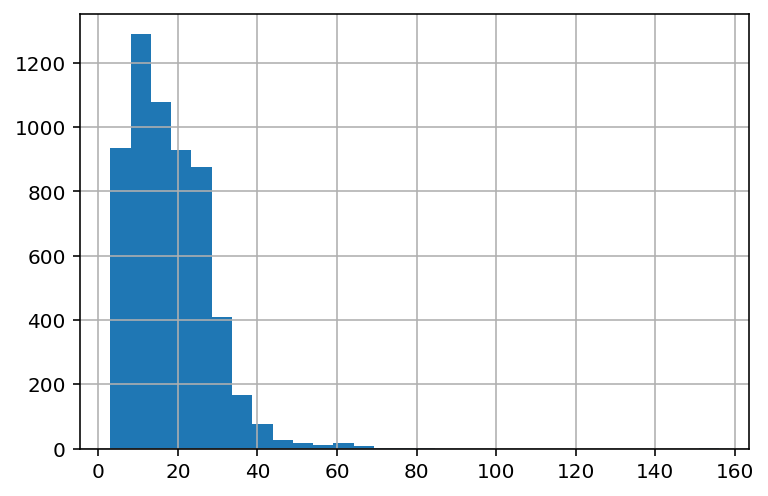

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


loading configuration file https://huggingface.co/aubmindlab/bert-base-arabertv02-twitter/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/1109ac490c1eb90f74960e17c00032f27ea3c4be159567d7ed5d2b5908f9855c.01294502d101541d98086466d32c6b4f04698a90a573cd06480d05bd0c20b2aa
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02-twitter",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 6

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([    2,  2215, 14910, 24349, 17864, 10964,   209,  1955, 30317,   303,
         21061,   446,   606, 17485,  7618,   727,   325,   306, 24974, 59521,
           181, 32022, 13963,     3,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'labels': tensor(0),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5846
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 183


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.475500,0.629942,0.720281,0.704505,0.794125,0.725513


***** Running Evaluation *****
  Num examples = 12248
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=183, training_loss=0.47552406853014, metrics={'train_runtime': 3733.5286, 'train_samples_per_second': 1.566, 'train_steps_per_second': 0.049, 'total_flos': 120167752315200.0, 'train_loss': 0.47552406853014, 'epoch': 1.0})

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 12248
  Batch size = 64


### **Albadi Training**

In [ ]:
df_train= pd.read_csv('/content/Albadi.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]),
 'input_ids': tensor([    2,    37,    38,   210,   250, 16195,   241, 59202,   223,  6403,
           254,    37,    41, 18600,   177,   243, 16195,   217,   258,   897,
          2006,   394, 20859, 42897,   181, 11199,  2538,   953,   994,   325,
            20,    20,    20, 15376,    20,   130, 10964,   593,     3,     0]),
 'labels': tensor(0),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5240
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 164


Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 12248
  Batch size = 64


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.481600,0.663373,0.652188,0.615142,0.770328,0.659071




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=164, training_loss=0.48155217054413585, metrics={'train_runtime': 3515.4073, 'train_samples_per_second': 1.491, 'train_steps_per_second': 0.047, 'total_flos': 107711088288000.0, 'train_loss': 0.48155217054413585, 'epoch': 1.0})

### **Ar-PuFi Testing**

In [ ]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 12248
  Batch size = 64


PredictionOutput(predictions=array([[-0.7028105 ,  0.22009781],
       [-1.0558329 ,  1.021251  ],
       [-0.24124366,  0.04742557],
       ...,
       [-1.4061577 ,  0.7710791 ],
       [-1.4367212 ,  1.0079966 ],
       [-1.6979595 ,  1.1136681 ]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 1]), metrics={'test_loss': 0.6698708534240723, 'test_accuracy': 0.648514043109079, 'test_f1': 0.6108367816929783, 'test_precision': 0.7716580953262562, 'test_recall': 0.6573180832351384, 'test_runtime': 1412.5169, 'test_samples_per_second': 8.671, 'test_steps_per_second': 0.136})

### **L_HSAB Training**

In [ ]:
df_train= pd.read_csv('/content/L_HSAB.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

1    8417
0    2851
Name: Label, dtype: int64

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

(11268, 12248, 12248)

Token indices sequence length is longer than the specified maximum sequence length for this model (610 > 512). Running this sequence through the model will result in indexing errors


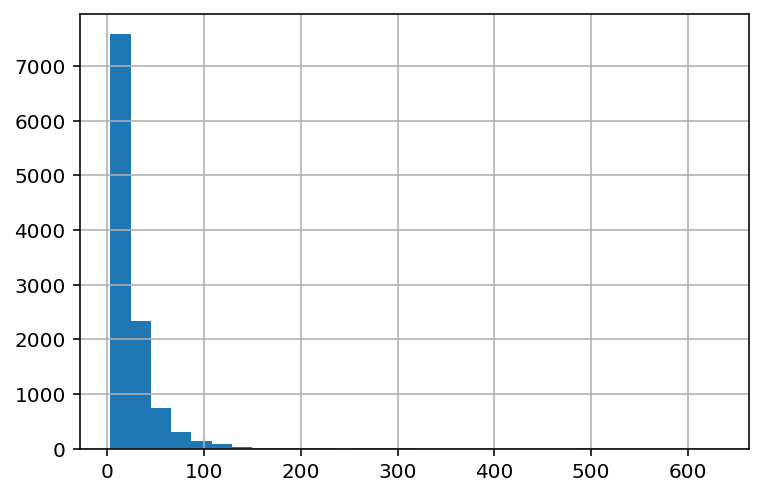

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


loading configuration file https://huggingface.co/aubmindlab/bert-base-arabertv02-twitter/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/1109ac490c1eb90f74960e17c00032f27ea3c4be159567d7ed5d2b5908f9855c.01294502d101541d98086466d32c6b4f04698a90a573cd06480d05bd0c20b2aa
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02-twitter",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 6

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 11268
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 353


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.402100,0.948242,0.644187,0.604497,0.764579,0.651205


***** Running Evaluation *****
  Num examples = 12248
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=353, training_loss=0.4021321585765979, metrics={'train_runtime': 6110.1182, 'train_samples_per_second': 1.844, 'train_steps_per_second': 0.058, 'total_flos': 231619950921600.0, 'train_loss': 0.4021321585765979, 'epoch': 1.0})

### **Ar-PuFi Testing**

In [ ]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 12248
  Batch size = 64


PredictionOutput(predictions=array([[-1.5283446,  1.0674655],
       [-1.0216197,  1.0321544],
       [-1.001656 ,  0.7747786],
       ...,
       [-1.9888253,  1.8500996],
       [-2.005578 ,  1.5249671],
       [-2.3796287,  1.9654527]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 1]), metrics={'test_loss': 0.9538342356681824, 'test_accuracy': 0.6419823644676682, 'test_f1': 0.6023885318052906, 'test_precision': 0.7658699463835771, 'test_recall': 0.6508998710657992, 'test_runtime': 1448.9521, 'test_samples_per_second': 8.453, 'test_steps_per_second': 0.133})

### **Ar-PuFi Testing**
### **T_HSAB Training**

In [ ]:
df_train= pd.read_csv('/content/T_HSAB.csv')
df_train

,Text,Label
0,اخس خوي اللي مايخليك تأكل الين يجي أسلوب يهود,1
1,الله أكبر \nالموت لأمريكا\nالموت لاسرائيل\nالل...,1
2,تحميل كتاب الملة والنحلة في اليهودية والمسيحية...,0
3,والله المفروض اول شي نقاطعه البحرين ودبي مع ...,1
4,منذ أن سحب الله البساط من تحت أقدام اليهود بال...,1
...,...,...
1261,لإخواني من أهل السنة الخلص أبشركم .\nثلاث أماك...,0
1262,قاتل اهل السنة في مصر https://t.co/zkrCG5ZLFt,0
1263,حسبي الله لا إله إلا هو عليه توكلت وهو ربّ الع...,0
1264,اتَّبِعِ الْحَقَّ وَلَا تُبَالِ ، وَاحْبِبِ ال...,0


In [ ]:
df_train['Label'].value_counts()

0    769
1    497
Name: Label, dtype: int64

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

(1266, 12248, 12248)

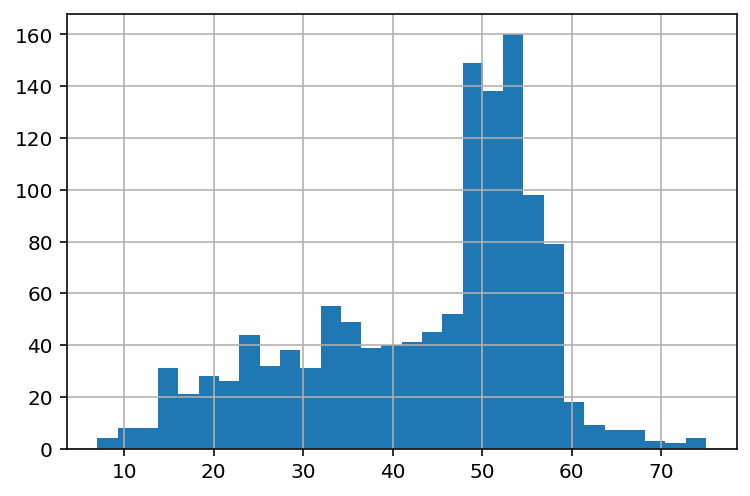

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


loading configuration file https://huggingface.co/aubmindlab/bert-base-arabertv02-twitter/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/1109ac490c1eb90f74960e17c00032f27ea3c4be159567d7ed5d2b5908f9855c.01294502d101541d98086466d32c6b4f04698a90a573cd06480d05bd0c20b2aa
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02-twitter",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 6

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([    2,  1741,   213, 43358,   193,  1729,  5435, 15669,   209, 31029,
         17639,   835,   193,  8062,  8262,     3,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'labels': tensor(1),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1266
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 40


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.672300,0.711793,0.489876,0.405850,0.461610,0.482110


***** Running Evaluation *****
  Num examples = 12248
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=40, training_loss=0.6722890377044678, metrics={'train_runtime': 1988.3195, 'train_samples_per_second': 0.637, 'train_steps_per_second': 0.02, 'total_flos': 26023327819200.0, 'train_loss': 0.6722890377044678, 'epoch': 1.0})

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 12248
  Batch size = 64


PredictionOutput(predictions=array([[-0.09106486, -0.5117286 ],
       [-0.08759226,  0.13106827],
       [-0.00437447, -0.26910627],
       ...,
       [-0.05193113, -0.47396585],
       [-0.48705724, -0.71674013],
       [-0.21492836, -0.47376072]], dtype=float32), label_ids=array([0, 0, 0, ..., 1, 1, 1]), metrics={'test_loss': 0.710873544216156, 'test_accuracy': 0.49052906596995427, 'test_f1': 0.4031660231250176, 'test_precision': 0.4574318031448103, 'test_recall': 0.48062795652099666, 'test_runtime': 1460.0293, 'test_samples_per_second': 8.389, 'test_steps_per_second': 0.132})

### **Mubarak_2020 Training**

In [ ]:
df_train= pd.read_csv('/content/Mubarak_2020.csv')
df_train

,Text,Label
0,مبروك و سامحونا لعجزنا التام. عقبال اللي جوه. ...,1
1,كلنا بره ومش هنبطل نزايد على العجايز الي جابون...,2
2,بدل ما انت قاعد بره كده تعالي ازرع الصحرا,1
3,قذر اتفووو ماتيجى مصر وتورينا نفسك كدا ياجبان,2
4,وهكذا رجال الشو اللي محرومين من عمل برنامج الغ...,2
...,...,...
1095,أستاذنا العزيز بلال فضل يحزنني أن يتم حذف حلقا...,1
1096,،برنامج يدعو للتفكير أكيد يمنعوه لأنهم خوافون ...,1
1097,"""#أزهى_عصور_المسخره هل ضيعت ""شيما"" محافظ بورس...",2
1098,الله يلعنك و يلعن اللى جابوك يا رمه جايفه,0


In [ ]:
df_train['Label'].value_counts()

1    453
2    444
0    203
Name: Label, dtype: int64

In [ ]:
df_train['Label'] = df_train['Label'].replace([2],[0])
df_train['Label'].value_counts()

# frames= [Writer,Sport, Judiciary, Politics, Art, Business]
# df= pd.concat(frames)

0    647
1    453
Name: Label, dtype: int64

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

(1100, 12248, 12248)

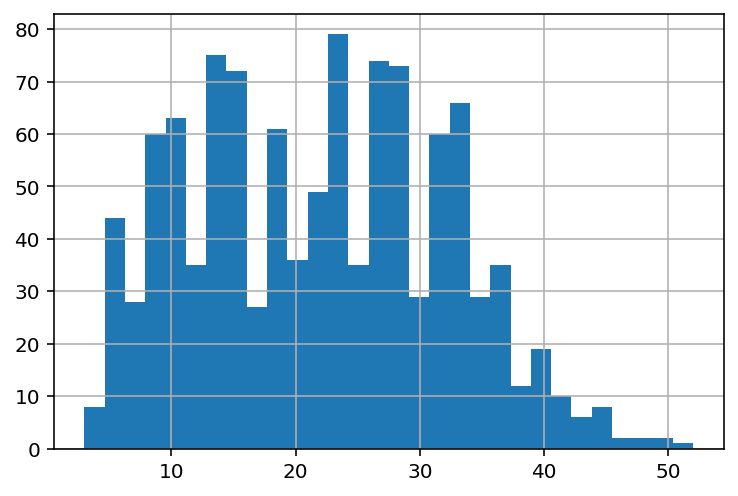

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


loading configuration file https://huggingface.co/aubmindlab/bert-base-arabertv02-twitter/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/1109ac490c1eb90f74960e17c00032f27ea3c4be159567d7ed5d2b5908f9855c.01294502d101541d98086466d32c6b4f04698a90a573cd06480d05bd0c20b2aa
Model config BertConfig {
  "_name_or_path": "aubmindlab/bert-base-arabertv02-twitter",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.18.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 6

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([    2, 15376,   139, 14838,  3302, 59565,   325,  9825,    20,  2544,
           299,  1729, 13275,    20,  1729, 32081,  1955, 46674,  1955, 31094,
          3361,   323, 10570,   212,     3,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'labels': tensor(1),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1100
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 35


Epoch,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 12248
  Batch size = 64


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.710800,0.692633,0.520983,0.393749,0.557715,0.511489




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=35, training_loss=0.7107640402657646, metrics={'train_runtime': 1886.9683, 'train_samples_per_second': 0.583, 'train_steps_per_second': 0.019, 'total_flos': 22611106320000.0, 'train_loss': 0.7107640402657646, 'epoch': 1.0})

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

***** Running Prediction *****
  Num examples = 12248
  Batch size = 64


### **Chowdhury Training**

In [ ]:
df_train= pd.read_csv('/content/Chowdhury.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

### **Let_Mi Training**

In [ ]:
df_train= pd.read_csv('/content/Let_Mi.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

### **ArSarcasm Training**

In [ ]:
df_train= pd.read_csv('/content/ArSarcasm.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

### **Mubarak_2022 Training**

In [ ]:
df_train= pd.read_csv('/content/Mubarak_2022.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)

### **ArCybC Training**

In [ ]:
df_train= pd.read_csv('/content/ArCybC.csv')
df_train

In [ ]:
df_train['Label'].value_counts()

In [ ]:
train_texts, train_labels =df_train['Text'], df_train['Label']
temp_texts, temp_labels = df['Text'], df['Label']
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)
len(train_texts), len(val_texts), len(test_texts)

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

### **Ar-PuFi Testing**


In [ ]:
trainer.predict(test_dataset)